QUESTION 1
This is a one-sided test. From previous experiments we know that the Nxf1 C-allele allows for higher expression of target genes, compared to the the B-allele (true for 6/7 exp, 1/7 exp. no difference between B and C). Therefore we have reason to hypothesise that will be the case also for the 8th target gene, that has the same class of retrotransoposon as the others.

In [8]:
setwd("/home/ucsd-train05/biom262-2016/weeks/week03/R_files")

In [9]:
getwd()

[1] "/home/ucsd-train05/biom262-2016/weeks/week03/R_files"

QUESTION 2a
The t-test assumes that the two samples are normally distributed, and have equal variance. Before choosing to do a t-test, I will plot the data and test these assumptions. (All code below)
a) Plot shows that B-samples have an outlier and C-samples have a lot of variability compared to B.
b) Shapiro-Wilk normality test indicates that group B is NOT normal (p=0.0085), and that group C is normal (p=0.1805).
c) Variance test (p-value = 0.4201) tells us that there is insufficient evidence to reject the null hypothesis of equal variance.

Group C is normally distributed and the groups have similar variance, but group B is not normally distributed and I belive the mean will be skewed by the outlier - therefore I chose to do a Wilcoxon rank sum test.

,id,nxf1,raw,normal,cohort
1,N30F4.192,B,0.005473881,0.002223781,B6
2,N30F4.196,B,0.005268219,0.00214023,B6
3,N30F4.202,B,0.0219772,0.008928305,B6
4,N30F4.207,B,0.002978839,0.001210162,B6
5,N30F4.217,B,0.003176875,0.001290615,B6
6,N30F4.218,B,0.003622804,0.001471775,B6
7,N30F4.199,C,0.02649444,0.01076345,B6
8,N30F4.210,C,0.004281812,0.001739499,B6
9,N30F4.215,C,0.006276129,0.002549696,B6
10,N30F4.216,C,0.007962358,0.003234732,B6


The following objects are masked from B6 (pos = 7):

    cohort, id, normal, nxf1, raw

The following objects are masked from B6 (pos = 8):

    cohort, id, normal, nxf1, raw



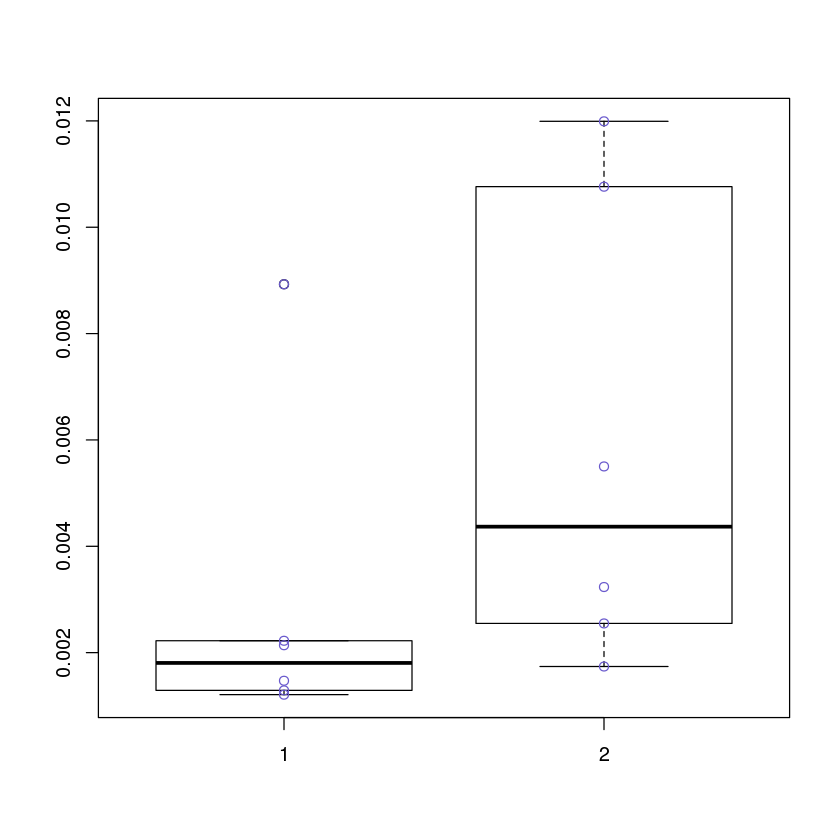

In [33]:
setwd("/home/ucsd-train05/biom262-2016/weeks/week03/R_files")
B6 <- read.table("adamts_B6.txt", header=T)
B6
attach(B6)
boxplot(normal[nxf1=='B'], normal[nxf1=='C'])
points(normal~nxf1, col="slateblue")

In [13]:
shapiro.test(normal[nxf1=='B'])
shapiro.test(normal[nxf1=='C'])
var.test(normal[nxf1=='B'],-normal[nxf1=='C'])


	Shapiro-Wilk normality test

data:  normal[nxf1 == "B"]
W = 0.62231, p-value = 0.0008452



	Shapiro-Wilk normality test

data:  normal[nxf1 == "C"]
W = 0.85741, p-value = 0.1805



	F test to compare two variances

data:  normal[nxf1 == "B"] and -normal[nxf1 == "C"]
F = 0.46464, num df = 5, denom df = 5, p-value = 0.4201
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.06501805 3.32052232
sample estimates:
ratio of variances 
         0.4646438 


QUESTION 2b
If we accept an alpha of 0.05, the p-value = 0.03247 indicates that allele B gives less expression of the target gene compared to allele C. (Code below).

In [17]:
wilcox.test(normal[nxf1=='B'],normal[nxf1=='C'], paired=F, alternative='less')



	Wilcoxon rank sum test

data:  normal[nxf1 == "B"] and normal[nxf1 == "C"]
W = 6, p-value = 0.03247
alternative hypothesis: true location shift is less than 0


QUESTION 3

In [35]:
setwd("/home/ucsd-train05/biom262-2016/weeks/week03/R_files")
F2 <- read.table("adamts_balbF2.txt", header=T)
F2
attach(F2)

,id.f2,nxf1.f2,raw.f2,normal.f2,cohort.f2
1,EB026,B,7e-05,0.000740424,4/3/09
2,EB211,B,0.00012,0.001157392,4/3/09
3,EB030,B,0.00014,0.001380945,4/3/09
4,EB034,B,0.00022,0.002208735,4/3/09
5,EB319,B,0.00091,0.009084916,4/3/09
6,EB189,B,0.00213,0.001081516,4/15/09
7,EB237,B,0.0031,0.001573233,4/15/09
8,EB279,B,0.00349,0.001772814,4/15/09
9,EB222,B,0.00372,0.001890922,4/15/09
10,EB342,B,0.00214,0.001334754,4/16/09


The following objects are masked from F2 (pos = 4):

    cohort.f2, id.f2, normal.f2, nxf1.f2, raw.f2

The following objects are masked from F2 (pos = 5):

    cohort.f2, id.f2, normal.f2, nxf1.f2, raw.f2

The following objects are masked from F2 (pos = 6):

    cohort.f2, id.f2, normal.f2, nxf1.f2, raw.f2

The following objects are masked from F2 (pos = 7):

    cohort.f2, id.f2, normal.f2, nxf1.f2, raw.f2



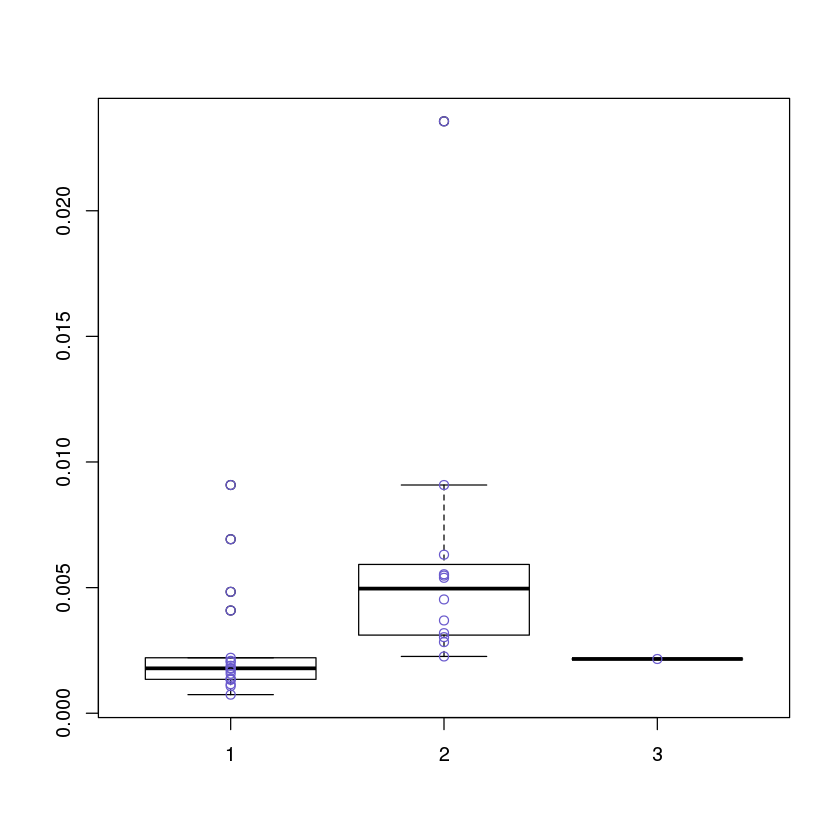

In [34]:
#Plot of data separating B, C and the H-individual.
boxplot(normal.f2[1:18],normal.f2[19:30], normal.f2[31])
points(normal.f2~nxf1.f2, col="slateblue")

In [25]:
shapiro.test(normal.f2[nxf1.f2=='B'])
shapiro.test(normal.f2[nxf1.f2=='C'])
var.test(normal.f2[nxf1.f2=='B'],-normal.f2[nxf1.f2=='C'])


	Shapiro-Wilk normality test

data:  normal.f2[nxf1.f2 == "B"]
W = 0.70643, p-value = 9.494e-05



	Shapiro-Wilk normality test

data:  normal.f2[nxf1.f2 == "C"]
W = 0.62012, p-value = 0.0001587



	F test to compare two variances

data:  normal.f2[nxf1.f2 == "B"] and -normal.f2[nxf1.f2 == "C"]
F = 0.15002, num df = 17, denom df = 11, p-value = 0.0005963
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.04571359 0.43049035
sample estimates:
ratio of variances 
         0.1500155 


Shapiro-Wilk test indicates that neither B nor C is normally distributed, and the variance test that the groups do not have equal variance. I will therefore do a Wilcoxon Rank Sum test.

In [29]:
#Wilcox without the H-individual
wilcox.test(normal.f2[1:18],normal.f2[19:30],paired=F,alternative="less")


	Wilcoxon rank sum test

data:  normal.f2[1:18] and normal.f2[19:30]
W = 32, p-value = 0.0003972
alternative hypothesis: true location shift is less than 0


In [30]:
#Wilcox with the H-individual
wilcox.test(normal.f2[1:18],normal.f2[19:31],paired=F,alternative="less")


	Wilcoxon rank sum test

data:  normal.f2[1:18] and normal.f2[19:31]
W = 37, p-value = 0.0004375
alternative hypothesis: true location shift is less than 0


QUESTION 4
Both data sets show that allele B gives statistically significant less expression than C. This is the case also when the H-individual is included in group C. The p-value for the B6 data set is weak, but still consistent with experiment balb.F2 that has a much stronger p-value. B6 is a much smaller data set. Including results from previous experiments I would be confident that Nfx1 does influence the target genes.

QUESTION 5 
Parametric tests are more sensitive to outliers.